In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [52]:
data = pd.read_csv('diamonds.csv')
data.drop(data.columns[0], axis=1, inplace=True)

In [53]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])

data[['cut', 'color', 'clarity']] = encoder.fit_transform(data[['cut', 'color', 'clarity']])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75


In [54]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


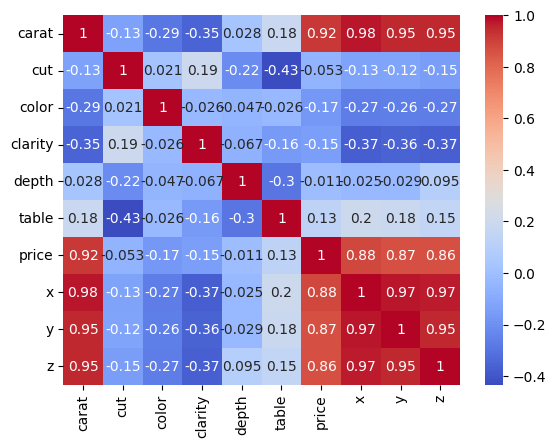

In [55]:
# sns.pairplot(data)
# plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()